In [1]:
!pip install mne

     |████████████████████████████████| 6.6MB 2.5MB/s 


In [4]:
import mne
import matplotlib.pyplot as plt
import numpy as np
from mne.channels import read_montage

ImportError: ignored

In [0]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!ls gdrive/'My Drive'/files.zip

'gdrive/My Drive/files.zip'


In [0]:
from zipfile import ZipFile
# Create a ZipFile Object and load sample.zip in it
with ZipFile('gdrive/My Drive/files.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [0]:
raw = mne.io.read_raw_edf('files/S001/S001R05.edf', preload = True)

Extracting EDF parameters from /content/files/S001/S001R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...


# New Section

In [0]:
raw.rename_channels(lambda s: s.strip('.'))

<RawEDF | S001R05.edf, 64 x 20000 (125.0 s), ~9.9 MB, data loaded>

In [0]:
raw.ch_names

['Fc5',
 'Fc3',
 'Fc1',
 'Fcz',
 'Fc2',
 'Fc4',
 'Fc6',
 'C5',
 'C3',
 'C1',
 'Cz',
 'C2',
 'C4',
 'C6',
 'Cp5',
 'Cp3',
 'Cp1',
 'Cpz',
 'Cp2',
 'Cp4',
 'Cp6',
 'Fp1',
 'Fpz',
 'Fp2',
 'Af7',
 'Af3',
 'Afz',
 'Af4',
 'Af8',
 'F7',
 'F5',
 'F3',
 'F1',
 'Fz',
 'F2',
 'F4',
 'F6',
 'F8',
 'Ft7',
 'Ft8',
 'T7',
 'T8',
 'T9',
 'T10',
 'Tp7',
 'Tp8',
 'P7',
 'P5',
 'P3',
 'P1',
 'Pz',
 'P2',
 'P4',
 'P6',
 'P8',
 'Po7',
 'Po3',
 'Poz',
 'Po4',
 'Po8',
 'O1',
 'Oz',
 'O2',
 'Iz']

In [0]:
raw.annotations

<Annotations | 30 segments: T0 (15), T1 (8), T2 (7)>

In [0]:
print(set(raw.annotations.duration))
print(set(raw.annotations.description))
print(raw.annotations.onset[0])

{4.2, 4.1}
{'T2', 'T0', 'T1'}
0.0


In [0]:
events_from_annot, event_dict = mne.events_from_annotations(raw)
print(event_dict)
print(len(events_from_annot))

Used Annotations descriptions: ['T0', 'T1', 'T2']
{'T0': 1, 'T1': 2, 'T2': 3}
30


In [0]:
events_from_annot

array([[    0,     0,     1],
       [  672,     0,     3],
       [ 1328,     0,     1],
       [ 2000,     0,     2],
       [ 2656,     0,     1],
       [ 3328,     0,     3],
       [ 3984,     0,     1],
       [ 4656,     0,     2],
       [ 5312,     0,     1],
       [ 5984,     0,     3],
       [ 6640,     0,     1],
       [ 7312,     0,     2],
       [ 7968,     0,     1],
       [ 8640,     0,     2],
       [ 9296,     0,     1],
       [ 9968,     0,     3],
       [10624,     0,     1],
       [11296,     0,     3],
       [11952,     0,     1],
       [12624,     0,     2],
       [13280,     0,     1],
       [13952,     0,     3],
       [14608,     0,     1],
       [15280,     0,     2],
       [15936,     0,     1],
       [16608,     0,     2],
       [17264,     0,     1],
       [17936,     0,     3],
       [18592,     0,     1],
       [19264,     0,     2]])

In [0]:
raw.set_eeg_reference("average", projection = True)

Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.


<RawEDF | S001R05.edf, 64 x 20000 (125.0 s), ~9.9 MB, data loaded>

In [0]:
a = ['Fc5', 'Fc3', 'Fc1', 'Fcz', 'Fc2', 'Fc4', 'Fc6', 'Cp5', 'Cp3', 'Cp1', 'Cpz', 'Cp2', 'Cp4', 'Cp6', 'Af7', 'Af3', 'Afz', 'Af4', 'Af8', 'Ft7', 'Ft8', 'Tp7', 'Tp8', 'Po7', 'Po3', 'Poz', 'Po4', 'Po8']
len(a)

28

In [0]:
montage = mne.channels.read_montage("standard_1020")
raw.set_montage(montage)
montage.plot()

AttributeError: ignored

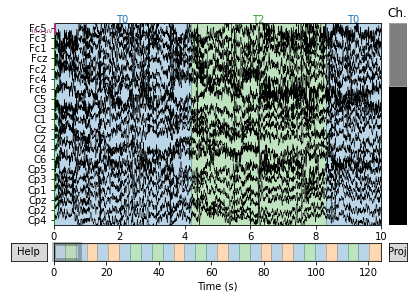

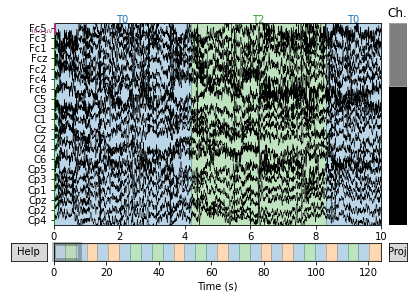

In [0]:
raw.plot()

In [0]:
from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs, corrmap)

In [0]:
ica = ICA(n_components=15, random_state=97)
ica.fit(raw)

Fitting ICA to data using 64 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selecting by number: 15 components
Fitting ICA took 0.8s.


<ICA  |  raw data decomposition, fit (fastica): 20000 samples, 15 components, channels used: "eeg">

In [0]:
ica.plot_components()

RuntimeError: ignored

In [0]:
ica.plot_sources(raw)

In [0]:
# blinks
ica.plot_overlay(raw, exclude=[1], picks='eeg')

In [0]:
ica.plot_properties(raw, picks=[0, 1])

NameError: ignored

In [0]:
ica.apply(raw)

In [0]:
raw.plot()

In [0]:
raw.filter(l_freq=6, h_freq=40)

In [0]:
raw.plot()

In [0]:
raw.plot(butterfly=True, color='#00000009', bad_color='r')

In [0]:
title = 'EEG Custom reference'
raw.plot_projs_topomap()

In [0]:
events = events_from_annot

In [0]:
raw.plot(events=events, n_channels=10)

In [0]:
print('Found %s events, first five:' % len(events))
print(events[:5])

# Plot the events to get an idea of the paradigm
# Specify colors and an event_id dictionary for the legend.
event_id = {'Auditory/Left': 2, 'Auditory/Right': 3,
            'rest': 1}
color = {1: 'green', 2: 'blue', 3: 'red'}

mne.viz.plot_events(events, raw.info['sfreq'], raw.first_samp, color=color,
                    event_id=event_id)

In [0]:
events

In [0]:
tmin, tmax = -0.2, 0.5
event_id = {'Auditory/Left': 2, 'Auditory/Right': 3}

baseline = (None, 0.0)
epochs = mne.Epochs(raw, events=events, event_id=event_id, tmin=tmin,
                    tmax=tmax, baseline=baseline,
                    picks=('eeg'))  # only include EEG

In [0]:
epochs.plot(block=True)

In [0]:
epochs.plot_drop_log()

In [0]:
picks = mne.pick_types(epochs.info, meg=False, eeg=True)
evoked_left = epochs['Auditory/Left'].average(picks=picks)
evoked_right = epochs['Auditory/Right'].average(picks=picks)

In [0]:
epochs_left = epochs['Left']

# ... or to select a very specific subset. This is the same as above:
evoked_left_again = epochs['Left/Auditory'].average(picks=picks)

In [0]:
evoked_left.plot(time_unit='s')
evoked_right.plot(time_unit='s')

In [0]:
for ep in epochs_left[:1]:
    print(ep)

In [0]:
epochs.plot_image(63, cmap='interactive', sigma=1., vmin=-250, vmax=250)

In [0]:
epochs.plot_image(combine='gfp', sigma=2., cmap="YlGnBu_r")

In [0]:
epochs.plot_topo_image(vmin=-250, vmax=250, title='ERF images', sigma=2.,
                       fig_facecolor='w', font_color='k')

In [0]:
raw.plot_sensors()
raw.plot_sensors('3d')

In [0]:
title = 'EEG Custom reference'
evoked_left.plot_topomap(times=[0.1], size=4., title=title, time_unit='s')
evoked_right.plot_topomap(times=[0.1], size=4., title=title, time_unit='s')

# Difference in ERP of left and right

In [0]:
left, right = epochs["Auditory/Left"].average(), epochs["Auditory/Right"].average()

# create and plot difference ERP
joint_kwargs = dict(ts_args=dict(time_unit='s'),
                    topomap_args=dict(time_unit='s'))
mne.combine_evoked([left, -right], weights='equal').plot_joint(**joint_kwargs)

In [0]:
data = left.data

In [0]:
data.shape

In [0]:
evoked = mne.EvokedArray(data, raw.info, tmin=raw.times[0])
evoked.plot(time_unit='s')

In [0]:
left.plot(spatial_colors=True, gfp=True, picks='eeg')

In [0]:
left.plot_topomap(time_unit='s')
right.plot_topomap(time_unit='s')

In [0]:
times = np.arange(-0.2, 0.5, 0.05)
left.plot_topomap(times=times, ch_type='eeg', time_unit='s')
right.plot_topomap(times=times, ch_type='eeg', time_unit='s')

In [0]:
left.plot_topomap(times='peaks', ch_type='eeg', time_unit='s')

In [0]:
data.shape